# Generate training samples

In [1]:
import torch
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import tqdm
import scipy.ndimage as sim
import sys


project_path = os.path.abspath(os.path.join(os.getcwd(), '..'))  # Parent of mltools
if project_path not in sys.path:
    sys.path.insert(0, project_path)

import mltools.utils.cuda_tools as cuda_tools
from mltools.networks import networks

device=cuda_tools.get_freer_device()

import sys
sys.path.append('../')

import utils
# import models
import importlib
importlib.reload(utils)

# plt.rcParams.update({'font.size': 18})

memory_available [46927, 48450, 48450, 48450, 24871, 24897, 24883, 24887]
best GPU: 1


<module 'utils' from '/data2/jiawei/llm-understanding/concept-learning/utils.py'>

In [2]:
config=utils.load_config('../yaml_makers/yamls/images_1/2x2x2_final/sc2ss2sb2_re/shape_color_size/seed=0.yaml')
x_tr,y_tr,l_tr,x_te,y_te,l_te=utils.generate_data(config,seed=42,forgen=True)

In [3]:
print(x_tr.shape)
print(x_te.shape)

(20000, 3, 28, 28)
(20000, 3, 28, 28)


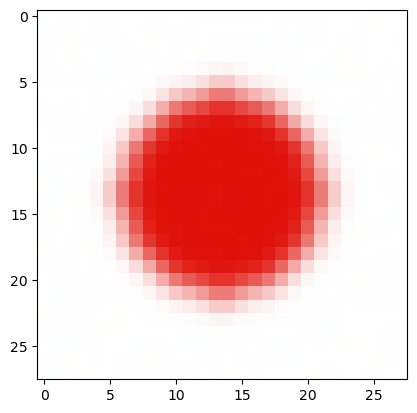

In [4]:
image=x_tr[l_tr==0][0].transpose(2,1,0)
plt.imshow(image)

# Save images

In [5]:
import os
import random
import json
import numpy as np
from PIL import Image
import utils  # Assuming this module has your `generate_data_images_1` function

# Define directory paths
DATASET_DIR = "/data2/jiawei/llm-understanding/concept_graphs/input/single-body_2d_3classes"
TRAIN_DIR = os.path.join(DATASET_DIR, "train")
TEST_DIR = os.path.join(DATASET_DIR, "test")

# Ensure directories exist
os.makedirs(TRAIN_DIR, exist_ok=True)
os.makedirs(TEST_DIR, exist_ok=True)

# Function to save images and metadata
def save_dataset(images, labels, classes, save_dir, prefix="CLEVR"):
    """
    Saves images as PNG files and their corresponding labels in JSON format,
    with filenames based on size, color, and shape.

    Args:
        images (numpy.ndarray): Generated images.
        labels (numpy.ndarray): Vectorized labels for each image.
        classes (numpy.ndarray): Class labels.
        save_dir (str): Directory where data will be stored.
        prefix (str): Filename prefix.
    """
    for idx, (img, label, cls) in enumerate(zip(images, labels, classes)):
        # Extract relevant data
        size = float(label[7])  # Object size
        color_rgb = label[4:7].tolist()  # RGB color
        shape_value = int(label[0])  # Assuming shape is stored here

        # Apply conditions for filename
        size_flag = 0 if size >= 0.5 else 1
        # ra = random.uniform(0, 1)
        # size_flag = 0 if ra >= 0.5 else 1
        color_flag = 0 if color_rgb[0] > color_rgb[2] else 1  
        shape_flag = shape_value  # Assuming 0 is the first shape

        # New filename with "CLEVR" prefix
        img_filename = f"{prefix}_{shape_flag}{color_flag}{size_flag}_{idx:05d}.png"
        json_filename = f"{prefix}_{shape_flag}{color_flag}{size_flag}_{idx:05d}.json"

        # Convert image to PIL format and save
        img = (img * 255).astype(np.uint8)  # Convert to [0,255] range
        img_pil = Image.fromarray(np.transpose(img, (1, 2, 0)))  # Convert to HxWxC
        img_pil.save(os.path.join(save_dir, img_filename))

        # Prepare the new JSON structure
        label_data = [
            size,  # First element: size
            color_rgb   # Second element: RGB list + shape
        ]

        # Save metadata as JSON
        with open(os.path.join(save_dir, json_filename), "w") as json_file:
            json.dump(label_data, json_file)

# Save training and testing data
save_dataset(x_tr, y_tr, l_tr, TRAIN_DIR, prefix="CLEVR")
save_dataset(x_te, y_te, l_te, TEST_DIR, prefix="CLEVR")

print("Dataset saved successfully!")


Dataset saved successfully!
